# Sangria highlight on fixed issues (2021)

In this notebook, we check:
1. the GB interpolation (upsampling), where we remove high frequency artifact by using a higher order interpolation or a 0 padding in Fourier space
2. the new dgb catalog, where inclination distribution is fixed and the very high amplitude source is removed using a cut on SNR
3. the match bewteen GB from sangria data and fastGB (C and python version)

In [1]:
import sys
sys.path.append("../")
from pipeviewer import PipeViewer  # where to find pipeviewer.py
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3.6/abc.py:133: FutureWarning: xarray subclass TDI should explicitly define __slots__
  cls = super().__new__(mcls, name, bases, namespace, **kwargs)


## 1. GB interpolation

In [2]:
pv_i3 = PipeViewer('/lisa/sangria/run2') # using interp order = 3 for GB to go from dt=15 to dt=3
pv_i9 = PipeViewer('/lisa/sangria/run3') # using interp order = 9 for GB to go from dt=15 to dt=2.5
pv_zeropad = PipeViewer('/lisa/sangria/run4') # using 0-padding in Fourier for GB to go from dt=15 to dt=2.5

### Projected strains before and after interpolation

(2e-05, 0.2, 2.7372295203782845e-23, 5.575526589268928e-14)

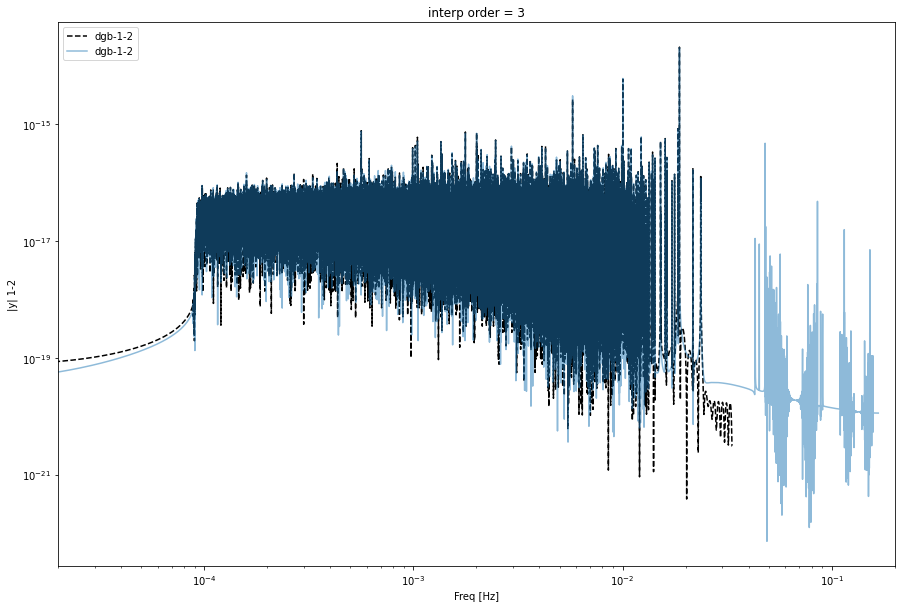

In [6]:
plt.figure(figsize=(15,10));
plt.title("interp order = 3")
pv_i3.plot_strain('dgb', time_domain=False, raw=True, ls='--', color='k') # before interpolation
pv_i3.plot_strain('dgb', time_domain=False, alpha=0.5) # after interpolation
plt.legend(loc='upper left')
plt.axis([2e-5, 0.2, None, None])

(2e-05, 0.2, 1.5743717124316656e-22, 5.129855434898476e-14)

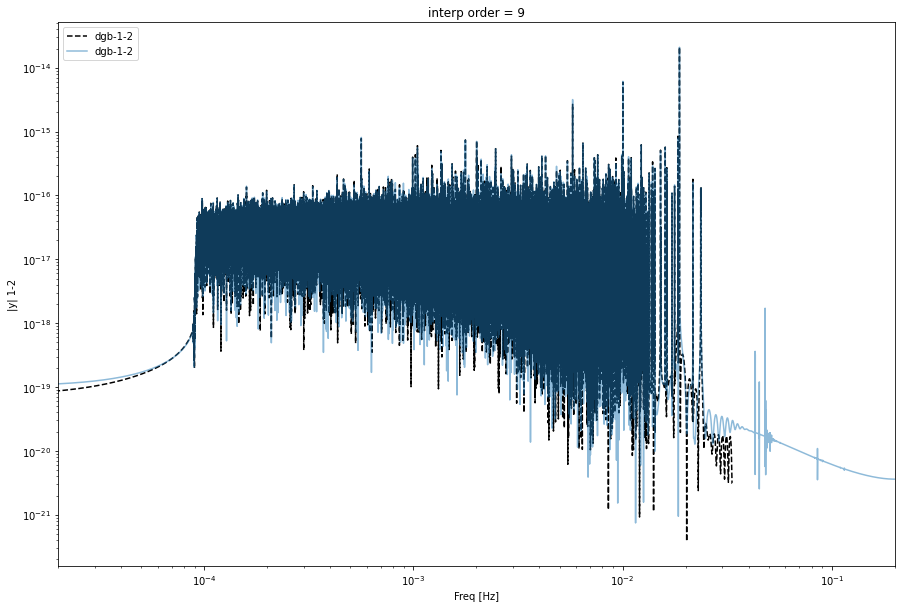

In [7]:
plt.figure(figsize=(15,10));
plt.title("interp order = 9")
pv_i9.plot_strain('dgb', time_domain=False, raw=True, ls='--', color='k') # before interpolation9
pv_i9.plot_strain('dgb', time_domain=False, alpha=0.5) # after interpolation
plt.legend(loc='upper left')
plt.axis([2e-5, 0.2, None, None])

(2e-05, 0.2, 4.850377678145768e-23, 5.425680998767254e-14)

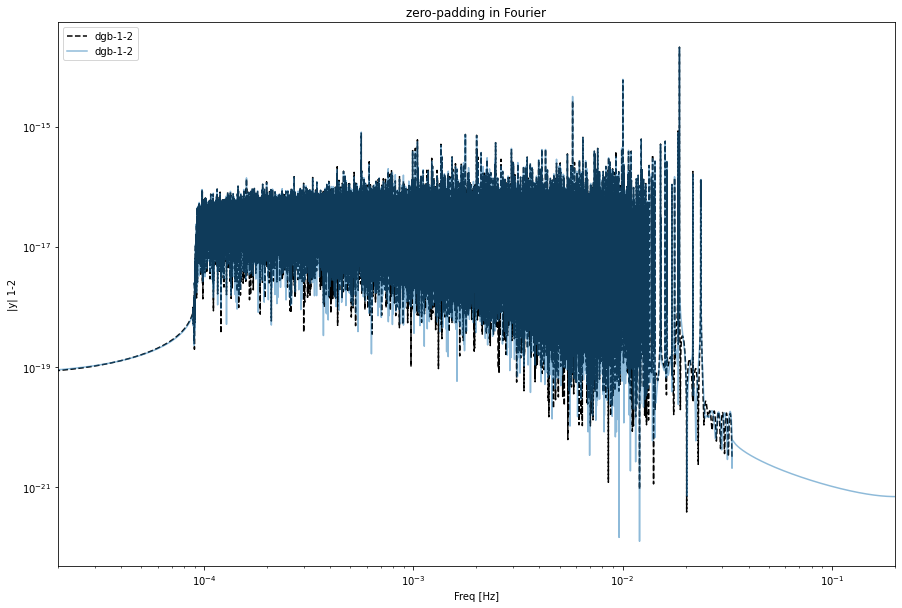

In [8]:
plt.figure(figsize=(15,10));
plt.title("zero-padding in Fourier")
pv_zeropad.plot_strain('dgb', time_domain=False, raw=True, ls='--', color='k') # before interpolation9
pv_zeropad.plot_strain('dgb', time_domain=False, alpha=0.5) # after interpolation
plt.legend(loc='upper left')
plt.axis([2e-5, 0.2, None, None])

### Noise free TDI from interpolated strains

(2e-05, 0.2, 1.6509311254101245e-27, 4.97931210981463e-13)

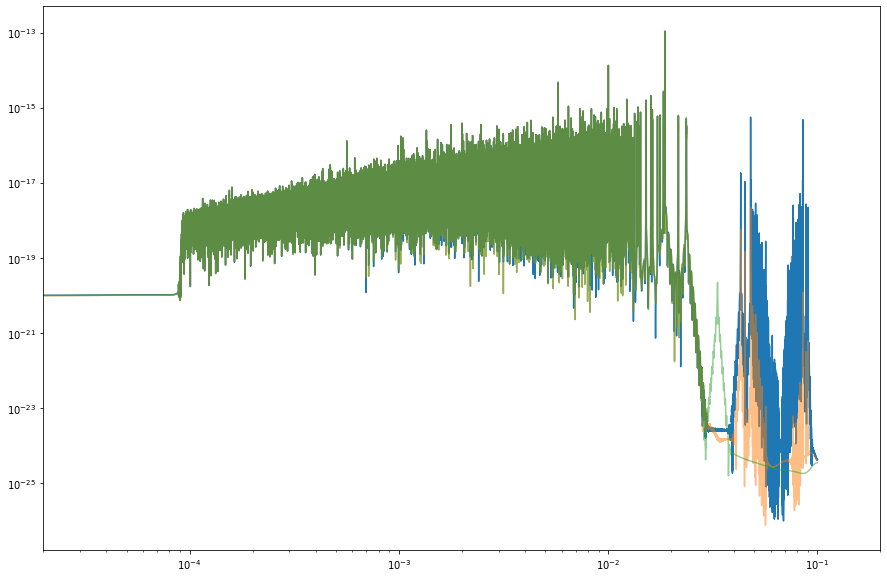

In [5]:
plt.figure(figsize=(15,10));
t3 = pv_i3.get_tdi_x_old('dgb', time_domain=False)
t9 = pv_i9.get_tdi_x('dgb', time_domain=False)
t0 = pv_zeropad.get_tdi_x('dgb', time_domain=False)
plt.loglog(t3.f, np.abs(t3), label='interp 3')
plt.loglog(t9.f, np.abs(t9), label='interp 9', alpha=0.5)
plt.loglog(t0.f, np.abs(t0), label='0-padding', alpha=0.5)
plt.axis([2e-5, 0.2, None, None])

## 2. New detached GB catalogs

In [8]:
pv = PipeViewer('/lisa/sangria/run5', subpath='run2')
pv_old = PipeViewer('/lisa/sangria/run3', subpath='run1')

### New detached GB

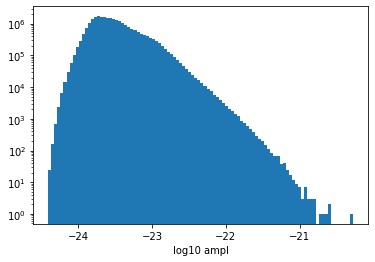

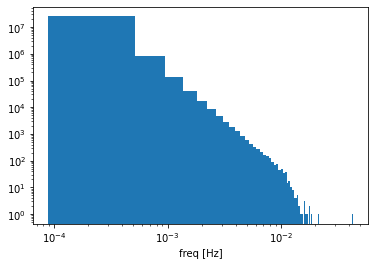

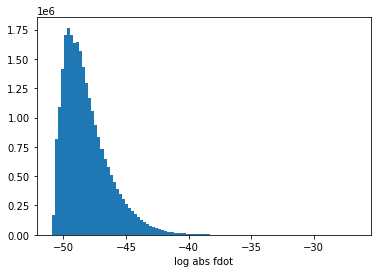

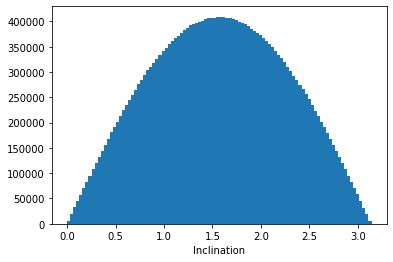

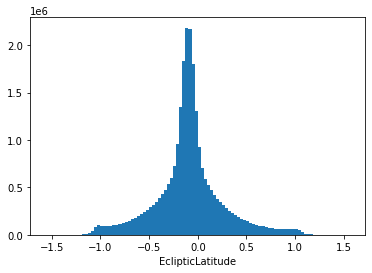

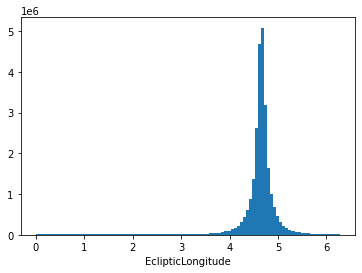

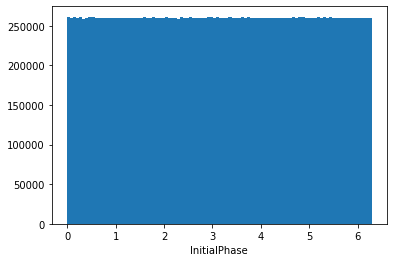

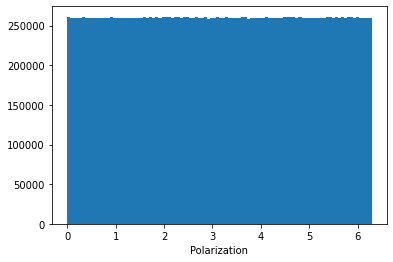

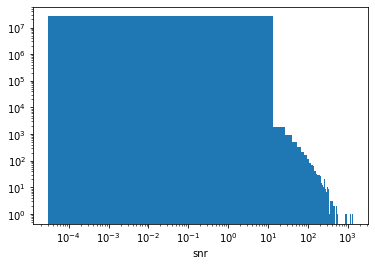

In [7]:
cat = pv.plot_catalog('dgb')

### Old detached GB

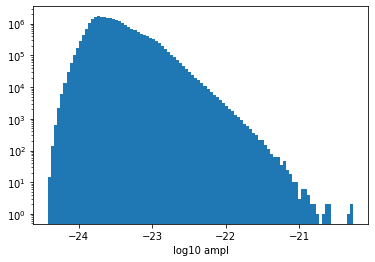

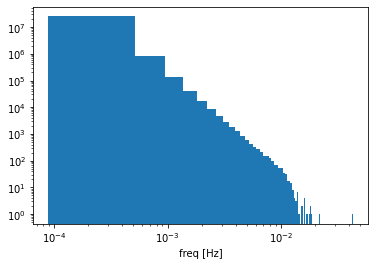

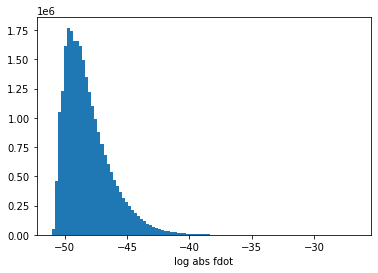

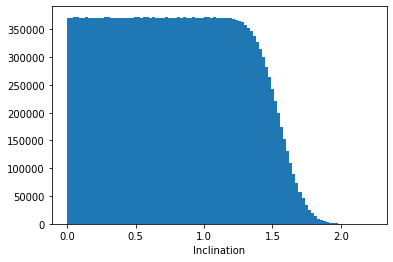

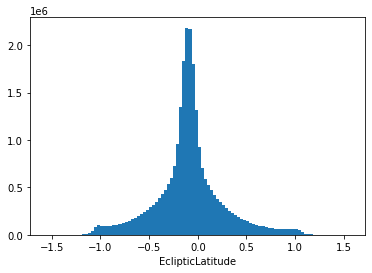

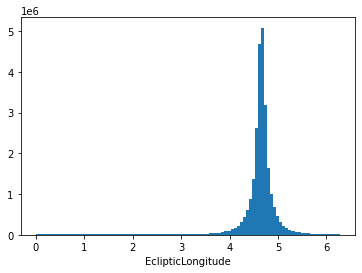

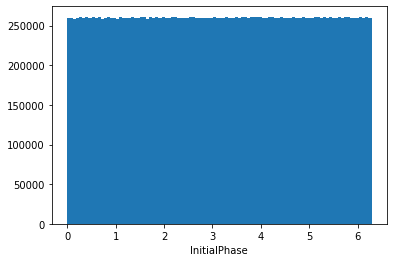

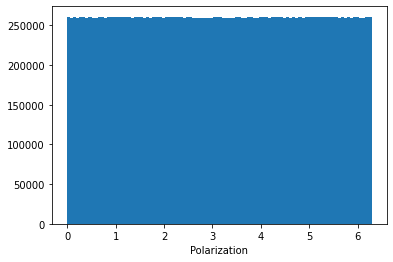

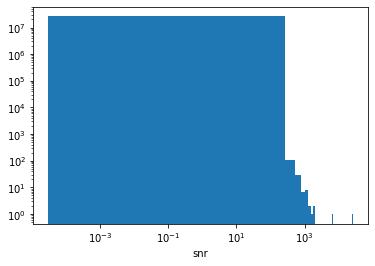

In [3]:
cat = pv_old.plot_catalog('dgb')

### Impact on projected strains 

Check the effect of removing the high amplitude source, on the projected strain before interpolation

(2e-05, 0.2, 1.5743717124316656e-22, 5.129855434898476e-14)

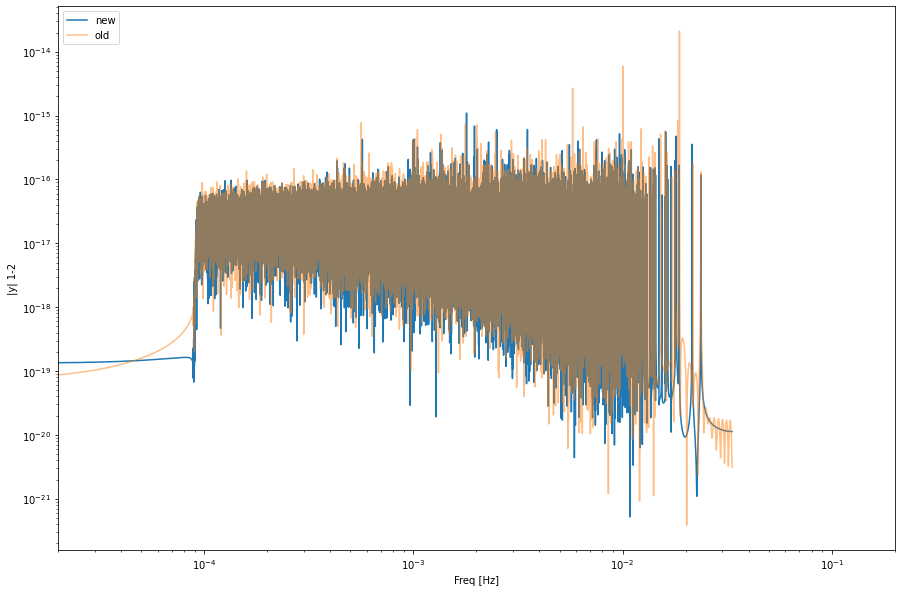

In [4]:
plt.figure(figsize=(15,10));
pv.plot_strain('dgb', time_domain=False, raw=True, label="new") # 
pv_old.plot_strain('dgb', time_domain=False, raw=True, alpha=0.5, label="old") # 
plt.legend(loc='upper left')
plt.axis([2e-5, 0.2, None, None])

(2e-05, 0.2, 2.870983580721843e-22, 4.959916183689218e-14)

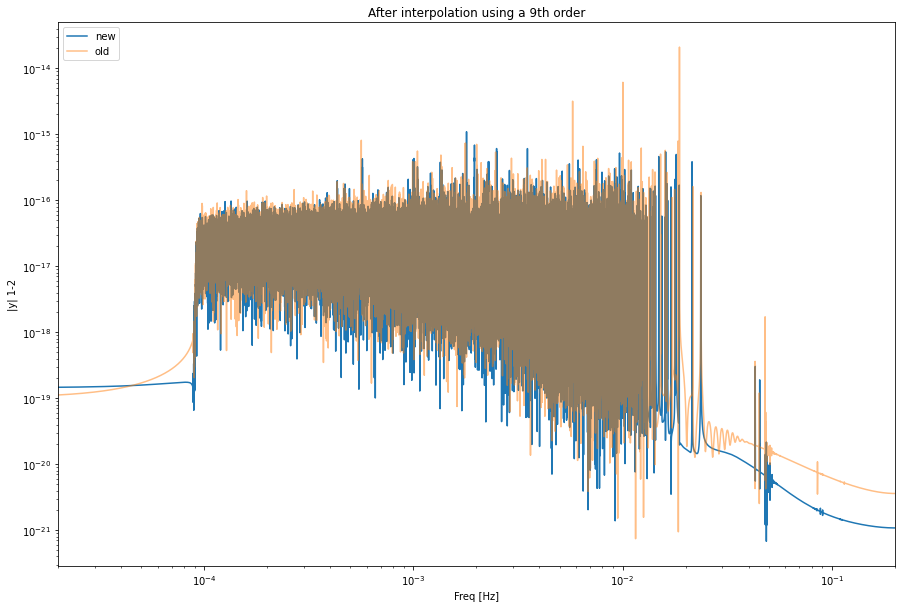

In [9]:
plt.figure(figsize=(15,10));
plt.title('After interpolation using a 9th order')
pv.plot_strain('dgb', time_domain=False, label="new") # 
pv_old.plot_strain('dgb', time_domain=False, alpha=0.5, label="old") # 
plt.legend(loc='upper left')
plt.axis([2e-5, 0.2, None, None])

## 3. FastGB debugging

Check that the noise free TDI output matches:
- fast waveform 
- single source projection using LDC tools

In [5]:
pv = PipeViewer('/lisa/sangria/run3') # using interp order = 9 for GB to go from dt=15 to dt=2.5

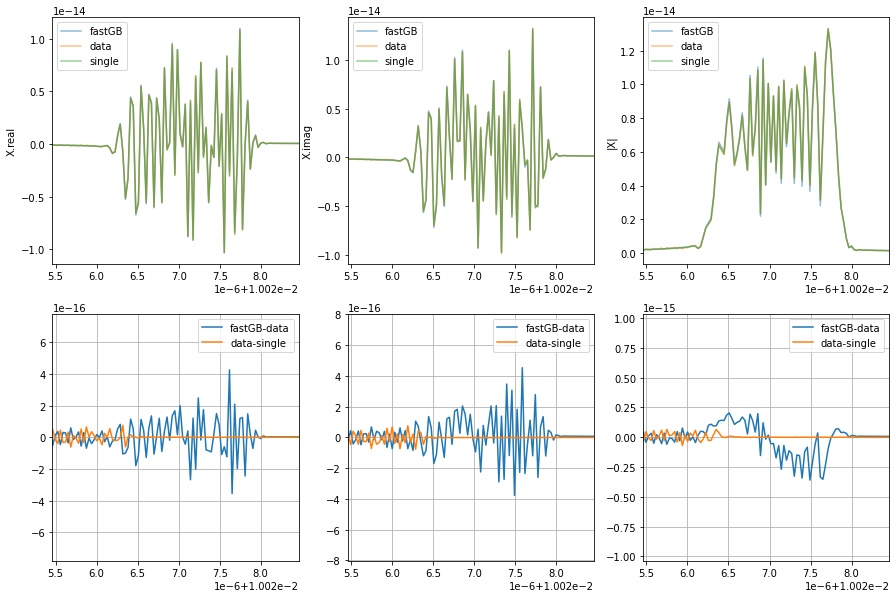

In [6]:
cat = np.array([(8837553, 4.688322047828039e-21, -0.7072278874089373,
                  3.5318990119515874,
                  0.01002696164199913, 7.0274293836061735e-15,
                  0.8456506362930373, 0.21987979316696454,
                  2.481152331028798)],
                  dtype=[('Name', '<i8'), ('Amplitude', '<f8'),
                         ('EclipticLatitude', '<f8'),
                         ('EclipticLongitude', '<f8'),
                         ('Frequency', '<f8'), ('FrequencyDerivative', '<f8'),
                         ('Inclination', '<f8'), ('InitialPhase', '<f8'),
                         ('Polarization', '<f8')])
    
plt.figure(figsize=(15,10));
plt.title("Using fastGB C version")
tdi = pv.check_gb_source(dict(zip(cat.dtype.names, cat[0])), source='dgb', single=True)

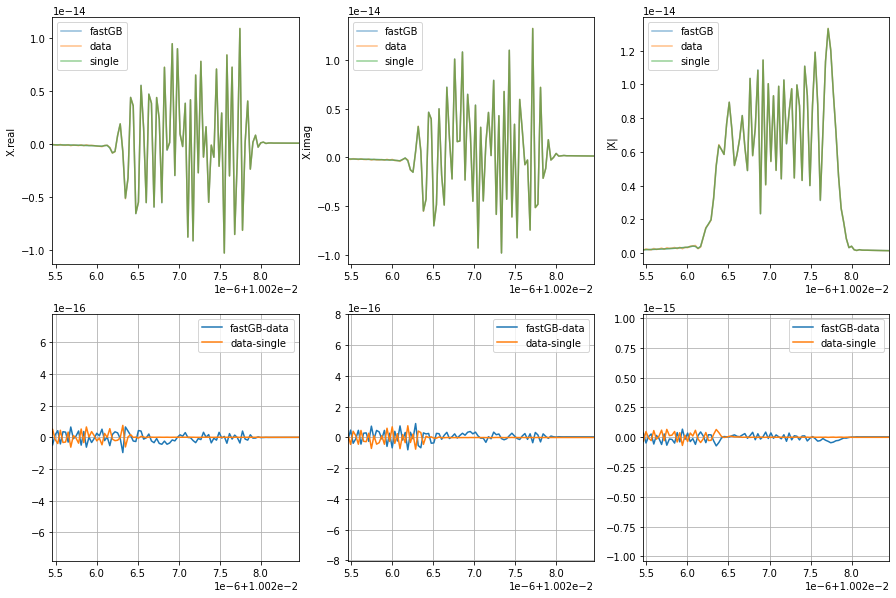

In [7]:
plt.figure(figsize=(15,10));
plt.title("Using fastGB python version")
tdi = pv.check_gb_source(dict(zip(cat.dtype.names, cat[0])), source='dgb', single=True, pure_python=True)